# S03 T01: Visualització gràfica d'un dataset (SEGUNDA PARTE)



## Nivel 3 (solo grafico lo que no he graficado en el ejercicio anterior)

### Ejercicio 3
Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 2.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


delayFlights = pd.read_csv('DelayedFlights.csv', index_col = 0)

#quita la notación científica
pd.options.display.float_format = '{:,.1f}'.format 

delayFlights[['Cancelled', 'Diverted']] = delayFlights[['Cancelled', 'Diverted']].astype('category')

• Année 2008
• Mois 1-12
• JourduMois 1-31
• DayOfWeek 1 (lundi) - 7 (dimanché)
• Heure de départ réelle DepTime (locale, hhmm)
• Heure de départ prévue CRSDepTime (locale, hhmm)
• ArrTime heure d'arrivée réelle (locale, hhmm)
• CRSArrTime heure d'arrivée définie (locale, hhmm)
• Code de transporteur unique UniqueCarrier
• Numéro de vol FlightNum
• Numéro de file d'attente de l'avion TailNum : immatriculation de l'avion, identifiant unique de l'avion
• ActualElapsedTime en minutes
• CRSElapsedTime en minutes
• Temps d'antenne en minutes
• Retard d'arrivée ArrDelay, en minutes : Un vol est compté comme « à l'heure » s'il a fonctionné moins de 15 minutes après l'heure indiquée dans les systèmes de réservation informatisés (CRS) des transporteurs.
• Délai de départ DepDelay, en minutes
• Code d'aéroport IATA d'origine
• Code de destination IATA de l'aéroport
• Distance en miles
• TaxiEn taxi dans le temps, en minutes
• TaxiOut temps de taxi en minutes
• Annulé *le vol a-t-il été annulé ?
• Code d'annulation raison de l'annulation (A = transporteur, B = météo, C = NAS, D = sécurité)
• Renvoi 1 = oui, 0 = non
• CarrierDelay en minutes : le retard du transporteur est sous le contrôle du transporteur aérien. Exemples d'événements pouvant déterminer le retard du transporteur : nettoyage de l'aéronef, dommages à l'aéronef, attente de l'arrivée des passagers ou de l'équipage en correspondance, bagages, impact d'oiseau, chargement de la cargaison, restauration, ordinateur, équipement du transporteur en panne, légalité de l'équipage (repos du pilote ou de l'accompagnateur) , dommages causés par des marchandises dangereuses, inspection technique, ravitaillement en carburant, prise en charge des passagers handicapés, équipage en retard , entretien des toilettes, maintenance, surventes, service d'eau potable, évacuation d'un passager indiscipliné, embarquement ou siège prêté, rangement des bagages à main, retards de poids et centrage.
• WeatherDelay en minutes : le délai météo est augmenté par des conditions météorologiques extrêmes ou dangereuses qui sont supposées ou se manifester au point de départ, en route ou au point d'arrivée.
• NASRetard en minutes : un retard sous le contrôle du système d'espace aérien national (NAS) peut inclure : des conditions météorologiques non extrêmes, des opérations aéroportuaires, un volume de trafic élevé, le contrôle du trafic aérien, etc.
• Délai de sécurité en minutes : le délai de sécurité est renforcé par l'évacuation d'un terminal ou d'un hall, le réembarquement d'un avion en raison d'une brèche de sécurité, un équipement de contrôle inopérant et/ou de longues files d'attente de plus de 29 minutes dans les zones de contrôle.
• LateAircraftDelay en minutes : retard d'arrivée à un aéroport dû à l'arrivée tardive du même avion à un aéroport précédent. L'effet d'entraînement d'un retard antérieur aux aéroports en aval est appelé propagation du retard.
>


Fes un informe complet del data set:.

- Resumeix estadísticament les columnes d’interès
-  Troba quantes dades faltants hi ha per columna
-  Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)
-  Taula de les aerolínies amb més endarreriments acumulats
-  Quins són els vols més llargs? I els més endarrerits?

**Cantidad de minutos perdidos por cada una de las cuatro causas de retraso y suma de ellas**

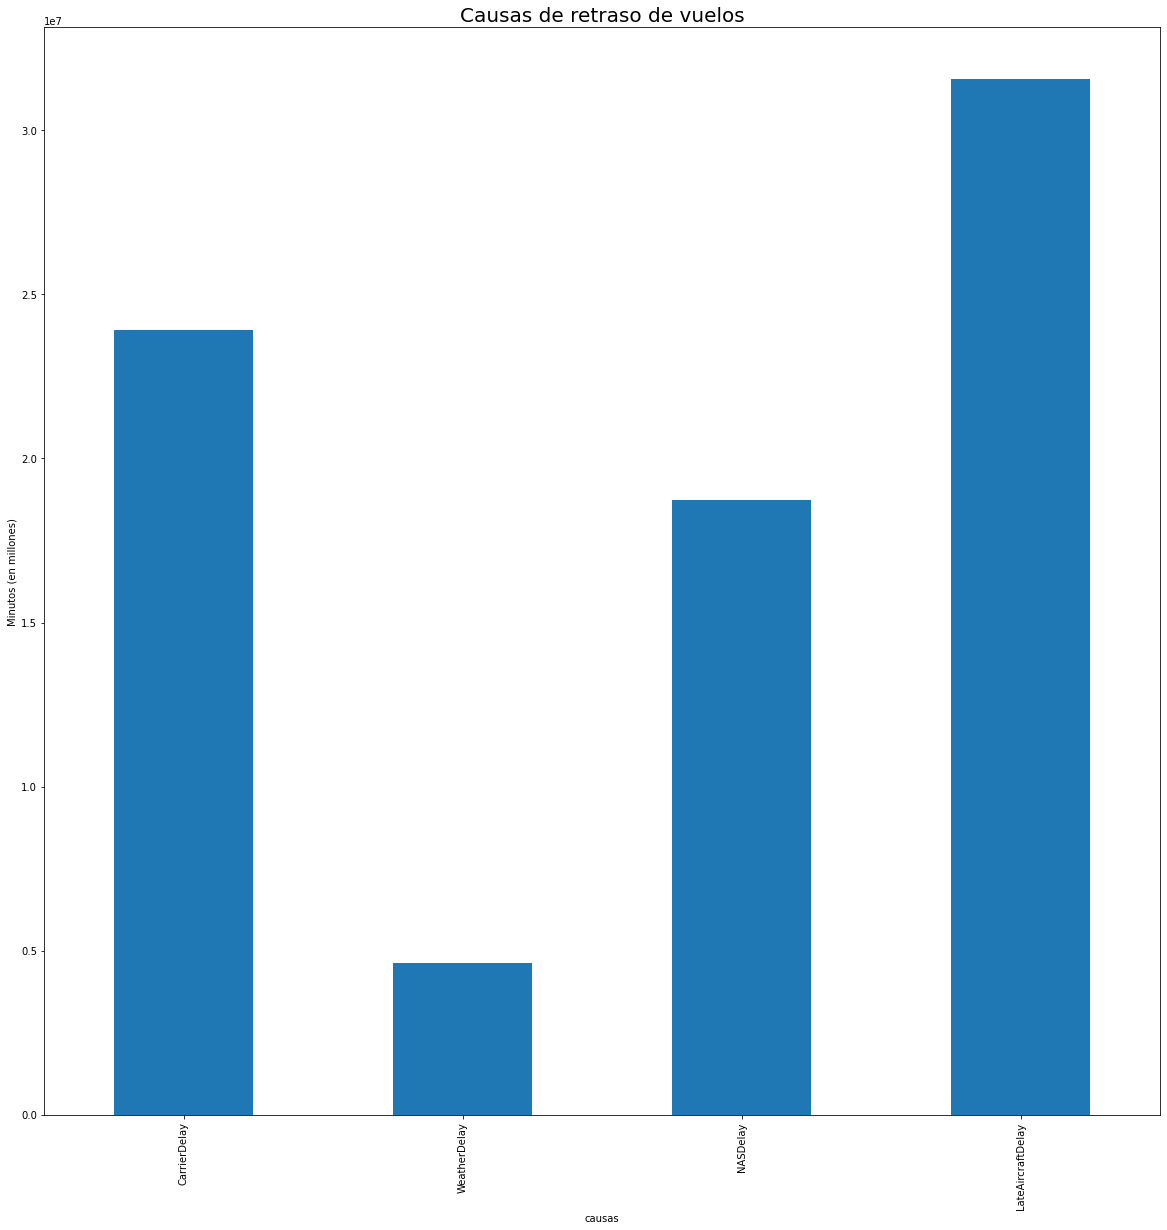

In [2]:
#CarrierDelay, WeatherDelay, NASDelay y LateAircraftDelay.
analisysDeley = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']

grafico=delayFlights[analisysDeley].sum()

#defino tamaño del gráfico, que sea barras 
grafico.plot(figsize = (20,20), kind = "bar") # si quisiera que sea apilada stacked = 'True' (pero no se ve bien)


plt.title("Causas de retraso de vuelos", fontsize = 20)
plt.xlabel("causas")
plt.ylabel("Minutos (en millones)")

plt.show()
                

**Media de minutos perdidos por cada causa**

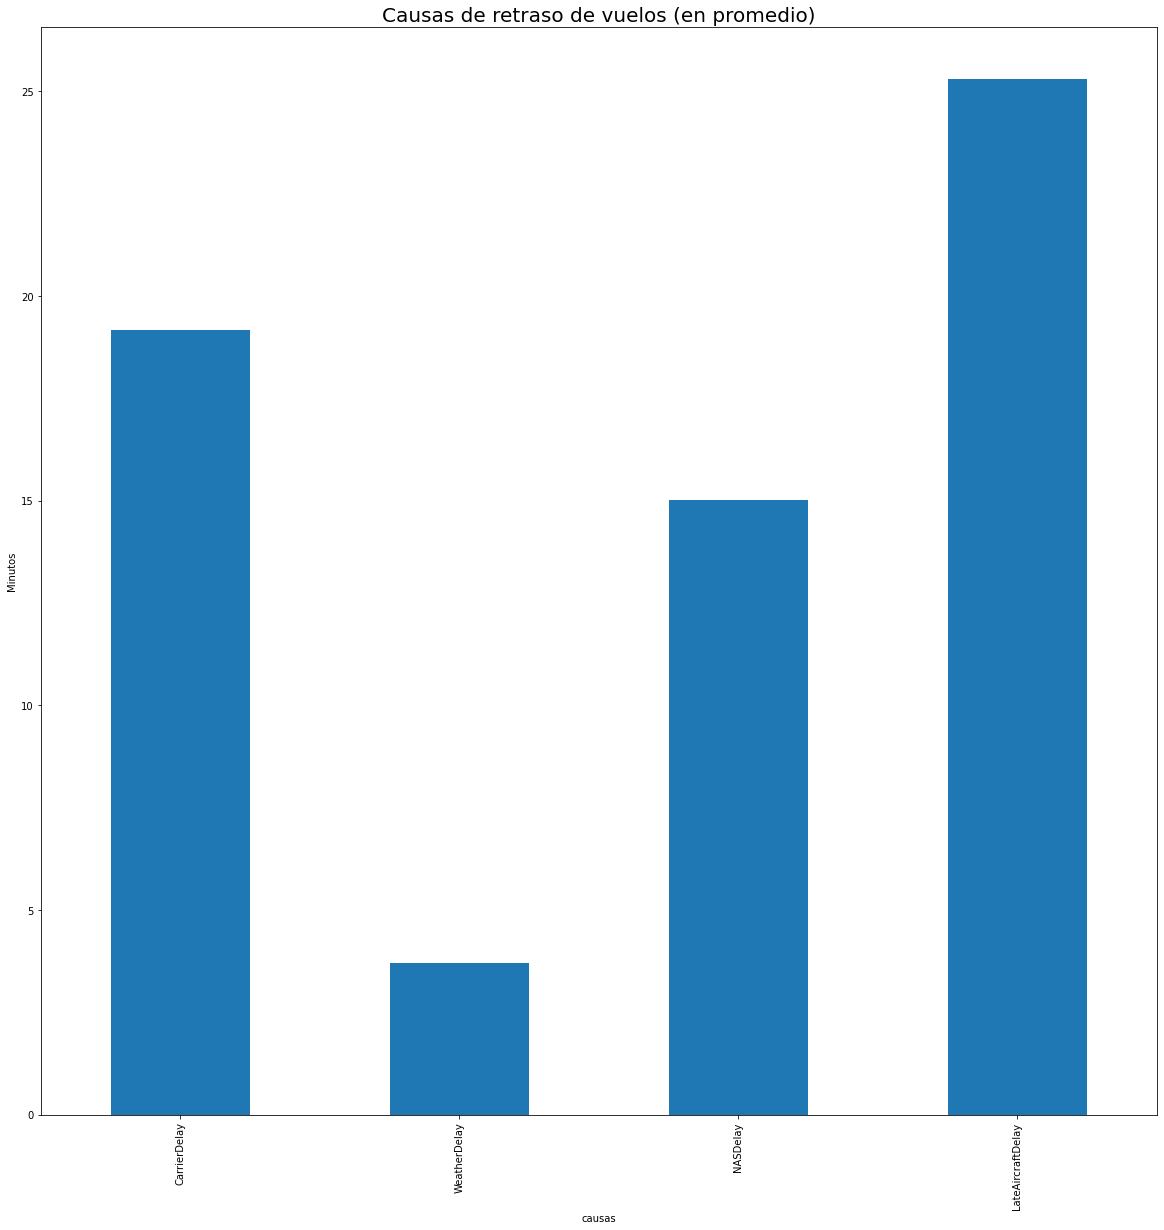

In [3]:

#CarrierDelay, WeatherDelay, NASDelay y LateAircraftDelay.
analisysDeley = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']

grafico=delayFlights[analisysDeley].mean()

#defino tamaño del gráfico, que sea barras 
grafico.plot(figsize = (20,20), kind = "bar") # si quisiera que sea apilada stacked = 'True' (pero no se ve bien)


plt.title("Causas de retraso de vuelos (en promedio)", fontsize = 20)
plt.xlabel("causas")
plt.ylabel("Minutos")

plt.show()

Creo un nuevo DataFrame solo con los datos de vuelos demorados para manipularlos

In [4]:
onlyDelay = pd.DataFrame().assign(CarrierDelay = delayFlights['CarrierDelay'], 
                                  WeatherDelay = delayFlights['WeatherDelay'], 
                                  NASDelay = delayFlights['NASDelay'], 
                                  LateAircraftDelay = delayFlights['LateAircraftDelay'],
                                  ArrDelay = delayFlights['ArrDelay'])



#### Crear nuevas columnas
Una columna marca la velocidad media de cada vuelo dividiendo la distancia de vuelo en la velocidad y multiplando por 60 para pasar de minutos a horas
La otro columna avisa si los vuelos tuvieron retraso o no y clasifica los mismos en cortos, normales y largos.

In [5]:
#Creo una columan de velocidad mmedia de vuelo millas/h
             
delayFlights["MeanFlight/h"] = delayFlights['Distance']/delayFlights['AirTime']*60


In [6]:
delayFlights[['Distance', 'AirTime', 'MeanFlight/h']].head()

,Distance,AirTime,MeanFlight/h
0,810,116.0,419.0
1,810,113.0,430.1
2,515,76.0,406.6
4,515,77.0,401.3
5,688,87.0,474.5


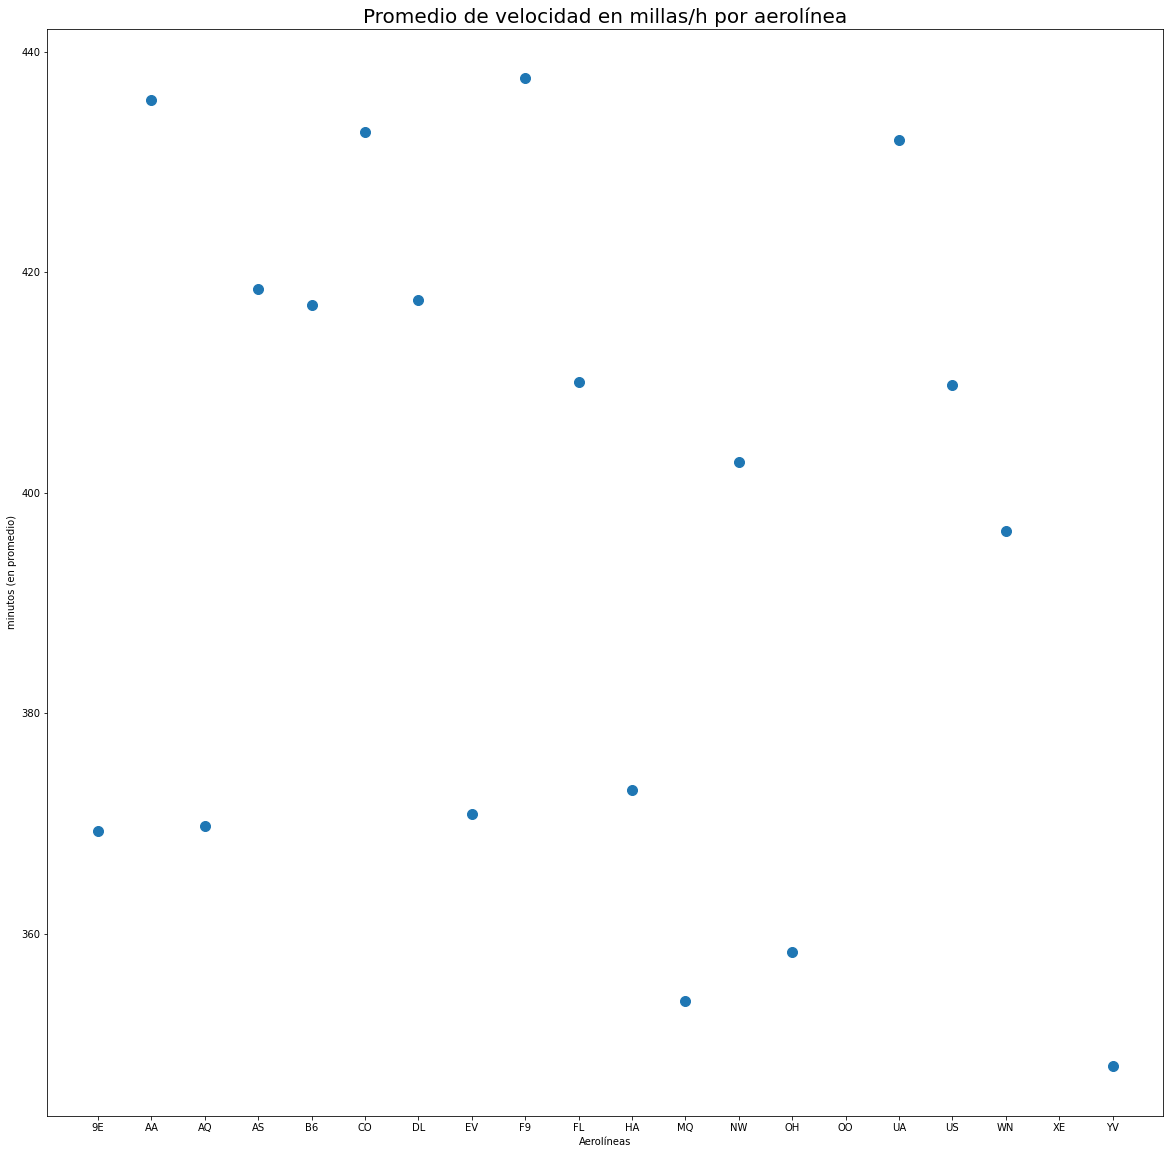

In [24]:
#agrupo el DATA por aerolínea
companies = delayFlights.groupby('UniqueCarrier')

#promedio de velocidad por aerolínea
velocityCompanies = companies['MeanFlight/h'].agg(np.mean)

#Defino cual será cada variable
y = velocityCompanies

#diseño la figura
plt.figure(figsize=(20,20)) #tamaño del g´rafico
plt.title('Promedio de velocidad en millas/h por aerolínea', fontsize = 20) #título
plt.xlabel('Aerolíneas') #nombre de la x
plt.ylabel('minutos (en promedio)') #nombre de la y
plt.plot(y,'o', ms = 10) #qué es la variable, su nombre y una marca en cada punto.

plt.show()


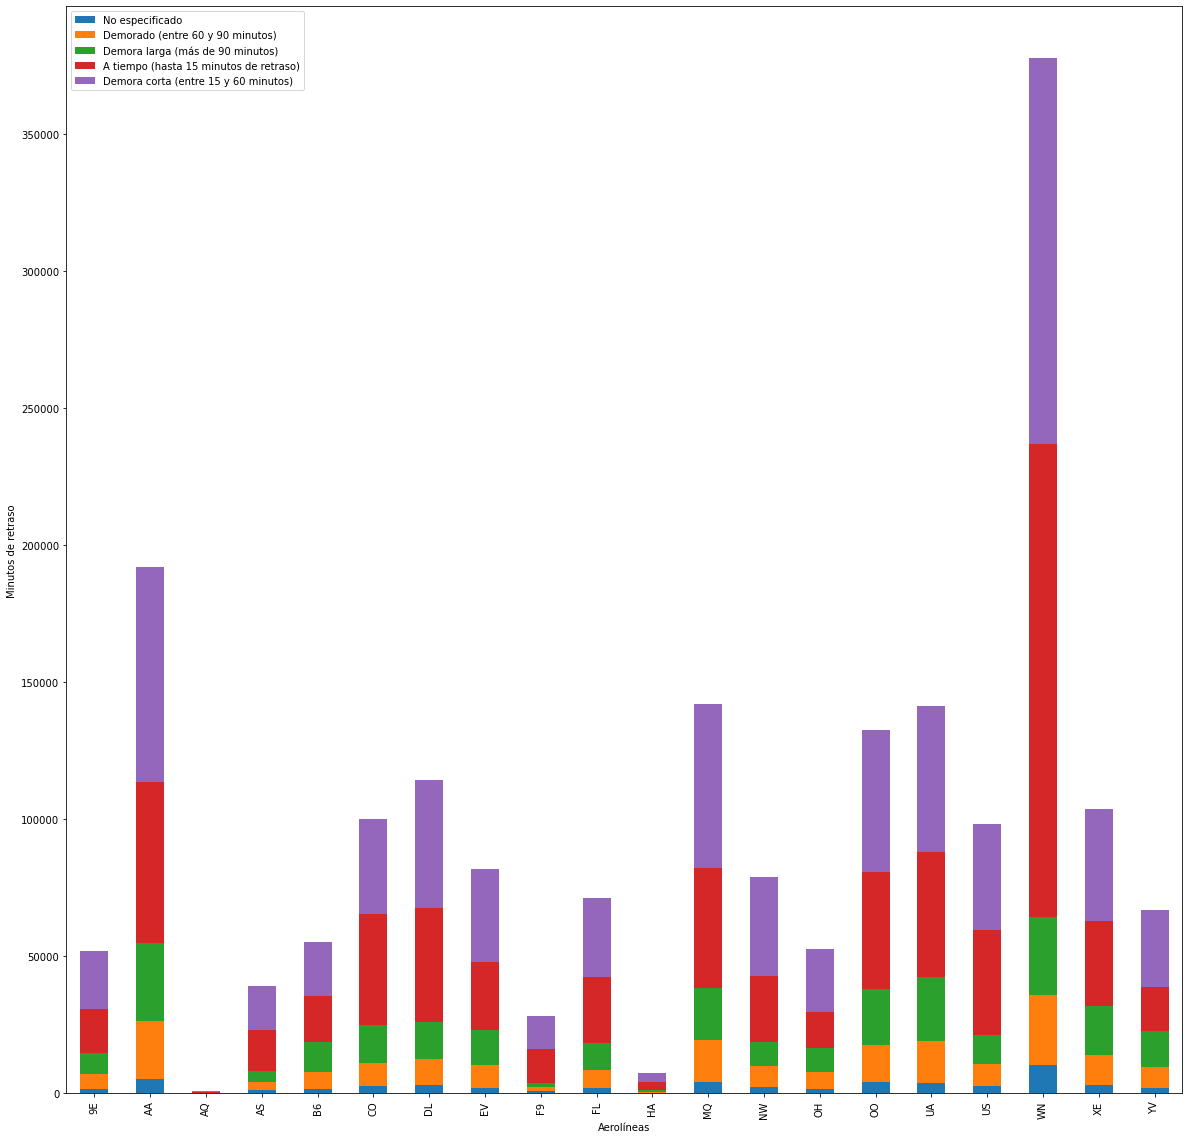

In [80]:
#Creo columnas que marquen los diferentes niveles de tardanza

conditions = [
    (delayFlights['ArrDelay'] < 15),
    (delayFlights['ArrDelay'] > 15) & (delayFlights['ArrDelay'] < 60),
    (delayFlights['ArrDelay'] > 60) & (delayFlights['ArrDelay'] < 90),
    (delayFlights['ArrDelay'] > 90),
    ]

# Creo una lista de tipos de retraso que deseo asignarle a cada condición
values = ['onTime','shortDelay' ,'delay' , 'longDelay']

# creo una nueva columna y uso np.select para asignarle el tipo de retraso que definí
delayFlights['TypesOfDeley'] = np.select(conditions, values, default='Not Specified')


#clasificationDeley = delayFlights['UniqueCarrier'].value_counts('TypesOfDeley')

#delayFlights[['UniqueCarrier', 'TypesOfDeley']]
#clasificationDeley.plot()

#agrupo el DATA por aerolínea
companies = delayFlights.groupby('UniqueCarrier')


#metodo pd.crosstab me agrupa las aerolíneas y dentro de estas suma cada tipo de demora
pd.crosstab(delayFlights['UniqueCarrier'],delayFlights['TypesOfDeley']).plot.bar(figsize=(20,20),
                                                                                 stacked = 'True')
                                                                                
                                                                                
plt.title = ('Tipo de retraso por aerolínea')
plt.xlabel("Aerolíneas")
plt.ylabel("Minutos de retraso")
plt.legend(['No especificado', 'Demorado (entre 60 y 90 minutos)', 
            'Demora larga (más de 90 minutos)', 
            'A tiempo (hasta 15 minutos de retraso)', 
            'Demora corta (entre 15 y 60 minutos)'], 
             loc='upper left') 
plt.show()






**El gráfico muestra los tipos de retraso por aerolínea**